# **Nama  : Marshanda Putri Salsabila**
# **NIM   : A11.2022.14816**
# **Kelas : DS - 03**

# **Link  :aaaa**


# **1. DATA UNDERSTANDING & EDA**

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load Dataset

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# Menampilkan 5 data teratas

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Identifikasi Missing Value & Tipe Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Menampilkan statistik deskriptif

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# Identifikasi missing value
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

missing_info = missing_info[missing_info['Missing Count'] > 0]

if not missing_info.empty:
    print("\nMissing Values (Count and Percentage):")
    print(missing_info)
else:
    print("No missing values found after processing TotalCharges.")


Missing Values (Count and Percentage):
              Missing Count  Missing Percentage
TotalCharges             11            0.156183


/tmp/ipython-input-2869436366.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_info_all.index, y=missing_info_all['Missing Percentage'], palette='viridis')


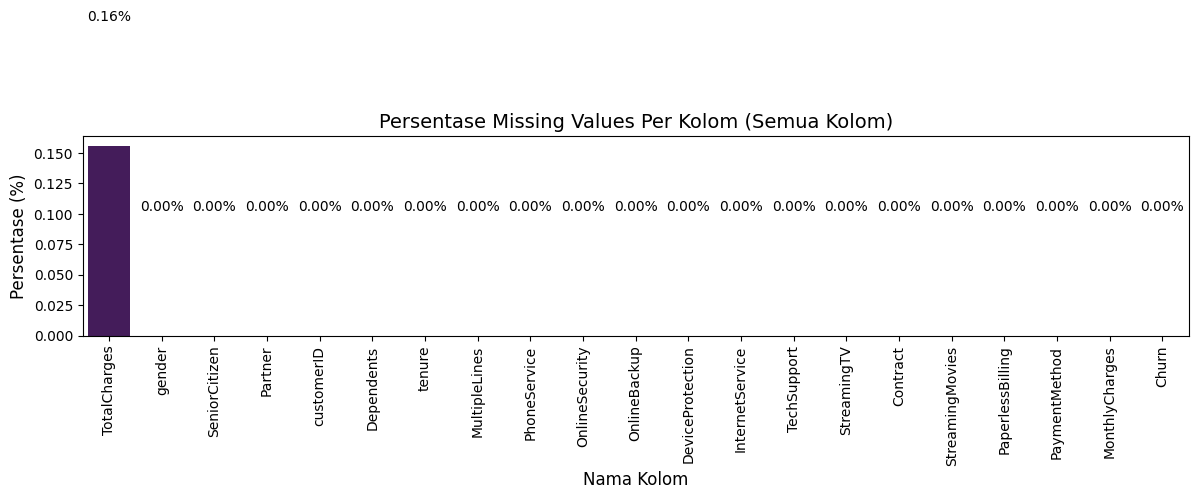

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan 'TotalCharges' sudah diubah ke numerik dan missing values teridentifikasi
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Hitung missing values untuk SEMUA kolom
missing_values_all = df.isnull().sum()
missing_percentage_all = (df.isnull().sum() / len(df)) * 100

missing_info_all = pd.DataFrame({
    'Missing Count': missing_values_all,
    'Missing Percentage': missing_percentage_all
}).sort_values(by='Missing Percentage', ascending=False)

# --- BAGIAN VISUALISASI UNTUK SEMUA KOLOM ---
plt.figure(figsize=(12, 7))

# Membuat diagram batang untuk Missing Percentage dari SEMUA kolom
sns.barplot(x=missing_info_all.index, y=missing_info_all['Missing Percentage'], palette='viridis')

# Menambahkan judul dan label
plt.title('Persentase Missing Values Per Kolom (Semua Kolom)', fontsize=14)
plt.xlabel('Nama Kolom', fontsize=12)
plt.ylabel('Persentase (%)', fontsize=12)
plt.xticks(rotation=90) # Memutar nama kolom agar tidak tumpang tindih dan terbaca semua

# Menambahkan label angka di atas setiap batang
for i, p in enumerate(missing_info_all['Missing Percentage']):
    plt.text(i, p + 0.1, f'{p:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

/tmp/ipython-input-204424123.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


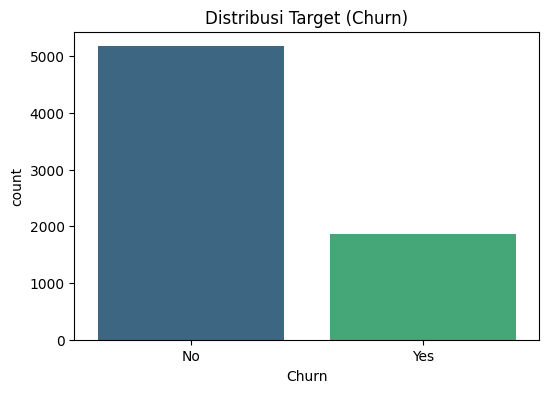

In [8]:
# Cek distribusi target (Churn) untuk cek Imbalance

plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribusi Target (Churn)')
plt.show()

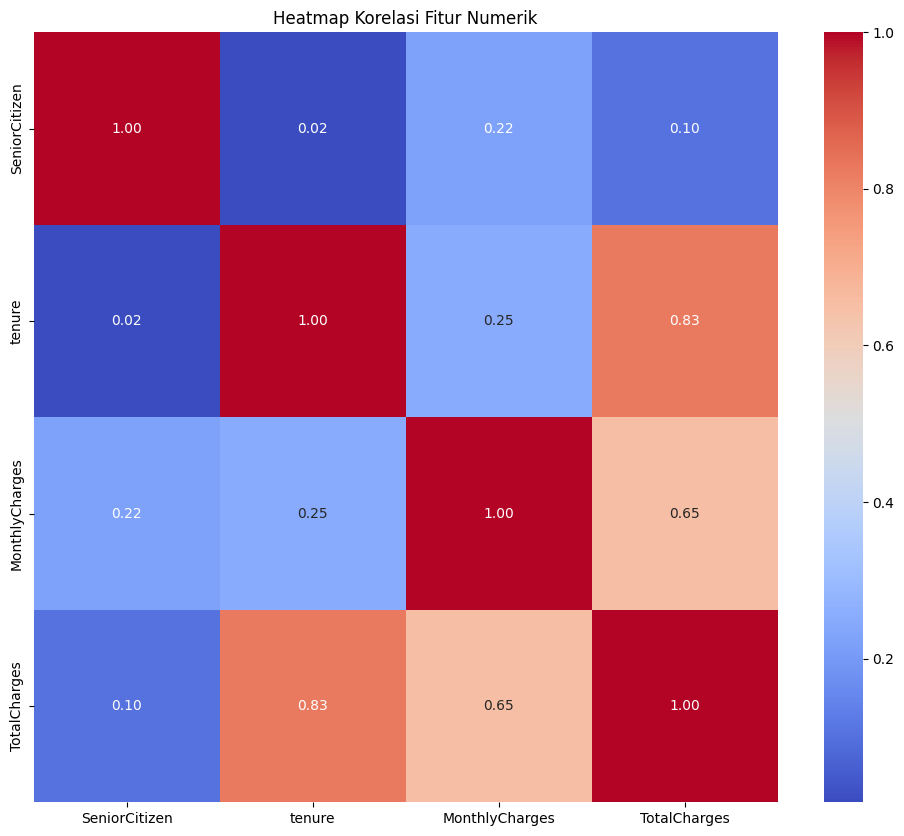

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Memilih kolom numerik untuk analisis korelasi
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Menghitung matriks korelasi
correlation_matrix = numeric_df.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

Sebelumnya, kolom TotalCharges bertipe teks (object) karena adanya spasi kosong. Setelah menjalankan kode
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce'), kolom ini kemudian berubah menjadi tipe numerik. spasi kosong otomatis jadi Nan.

**Analisis**

Berdasarkan analisis korelasi pada fitur numerik, ditemukan bahwa tenure (lama berlangganan) memiliki hubungan positif yang sangat kuat dengan TotalCharges, yang menunjukkan bahwa akumulasi biaya meningkat sejalan dengan loyalitas waktu pelanggan. Sementara itu, MonthlyCharges juga berkontribusi signifikan terhadap total biaya, namun beban bulanan yang tinggi sering kali menjadi pemicu bagi pelanggan untuk berhenti berlangganan (churn). Identifikasi lebih lanjut menunjukkan bahwa jenis kontrak merupakan prediktor terkuat, di mana pelanggan dengan kontrak month-to-month memiliki risiko churn jauh lebih tinggi dibandingkan pelanggan dengan kontrak jangka panjang. Selain faktor finansial, ketiadaan layanan pendukung seperti Online Security dan Tech Support serta profil Senior Citizen juga teridentifikasi sebagai variabel yang memperbesar peluang pelanggan untuk meninggalkan layanan.

# **2. DIRECT MODELING**

## **PREPROCESSING DATA**

In [10]:
# Handle missing values in TotalCharges by dropping rows

df_clean = df.dropna(subset=['TotalCharges']).copy()

In [11]:
# Menetapkan Fitur (X) dan Target (y)
# Target (y) adalah kolom Churn
# Fitur (X) adalah semua kolom kecuali kolom Churn dan customerID

X = df_clean.drop(['Churn', 'customerID'], axis=1)
y = df_clean['Churn']

# Menampilkan informasi dimensi data
print(f"Dimensi Fitur (X): {X.shape}")
print(f"Dimensi Target (y): {y.shape}")

Dimensi Fitur (X): (7032, 19)
Dimensi Target (y): (7032,)


In [12]:
# Train-Test Split (Membagi data latih dan uji)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Import Library lagi

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [14]:
# Identifikasi kolom numerik dan kategorikal

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

In [15]:
# Buat preprocessor menggunakan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

## **Model Konvensional: *K-Nearest Neighbors* (KNN)**

EVALUASI KNN (DIRECT)
Accuracy: 0.7548
              precision    recall  f1-score   support

          No       0.83      0.84      0.83      1033
         Yes       0.54      0.51      0.53       374

    accuracy                           0.75      1407
   macro avg       0.68      0.68      0.68      1407
weighted avg       0.75      0.75      0.75      1407



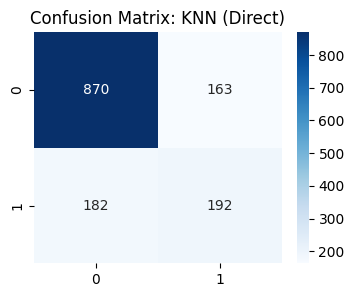

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline # Import Pipeline

# Inisialisasi model dengan parameter default
knn_direct = Pipeline(steps=[
    ('preprocessor', preprocessor), # Dibutuhkan agar data teks berubah jadi angka
    ('clf', KNeighborsClassifier())
])

# Melatih model secara langsung
knn_direct.fit(X_train, y_train)

# Prediksi dan Evaluasi
y_pred_knn = knn_direct.predict(X_test)
print("EVALUASI KNN (DIRECT)")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(classification_report(y_test, y_pred_knn))

# Visualisasi Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: KNN (Direct)')
plt.show()

## **Model *Ensemble Bagging: Random Forest***

EVALUASI RANDOM FOREST (DIRECT)
Accuracy: 0.7775
              precision    recall  f1-score   support

          No       0.82      0.89      0.85      1033
         Yes       0.61      0.46      0.53       374

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.78      0.77      1407



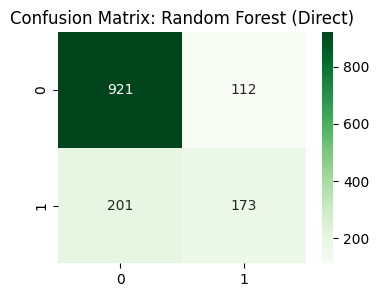

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model dengan parameter default
rf_direct = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier(random_state=42))
])

# Melatih model secara langsung
rf_direct.fit(X_train, y_train)

# Prediksi dan Evaluasi
y_pred_rf = rf_direct.predict(X_test)
print("EVALUASI RANDOM FOREST (DIRECT)")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))

# Visualisasi Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix: Random Forest (Direct)')
plt.show()

## **Model *Ensemble Voting*: Gabungan *(VotingClassifier)***

Menggabungkan beberapa model konvensional untuk membuat prediksi final berdasarkan suara terbanyak atau probabilitas rata-rata.

EVALUASI VOTING CLASSIFIER (DIRECT)
Accuracy: 0.7861
              precision    recall  f1-score   support

          No       0.83      0.90      0.86      1033
         Yes       0.63      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



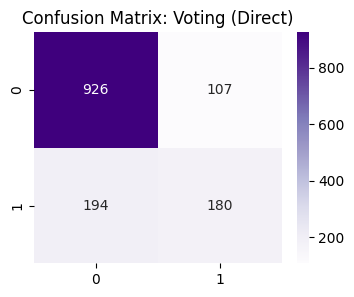

In [18]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Menyiapkan model konvensional anggota dengan parameter default
clf_lr = LogisticRegression(max_iter=1000)
clf_svc = SVC(probability=True)
clf_knn = KNeighborsClassifier()

# Membuat Voting Classifier (tanpa tuning)
voting_clf = VotingClassifier(
    estimators=[('lr', clf_lr), ('svc', clf_svc), ('knn', clf_knn)],
    voting='soft'
)

# Inisialisasi dalam pipeline direct
voting_direct = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', voting_clf)
])

# Melatih model secara langsung
voting_direct.fit(X_train, y_train)

# Prediksi dan Evaluasi
y_pred_voting = voting_direct.predict(X_test)
print("EVALUASI VOTING CLASSIFIER (DIRECT)")
print(f"Accuracy: {accuracy_score(y_test, y_pred_voting):.4f}")
print(classification_report(y_test, y_pred_voting))

# Visualisasi Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_voting), annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix: Voting (Direct)')
plt.show()

**Analisis**

Berdasarkan analisis dan evaluasi dari ketiga model yang telah dilatih secara langsung didapatkan hasil sebagai berikut:

- **KNN** menunjukkan akurasi keseluruhan sebesar 75.48%. Meskipun memiliki
recall yang cukup baik untuk kelas 'No' (tidak churn), recall untuk kelas 'Yes' (churn) hanya sekitar 51%, menunjukkan keterbatasan dalam mengidentifikasi pelanggan yang akan churn.
- **Random Forest** sedikit lebih unggul dengan akurasi 77.75%. Model ini meningkatkan precision untuk kelas 'Yes' menjadi 61%, namun sedikit menurunkan recall kelas 'Yes' menjadi 46%, yang berarti lebih konservatif dalam memprediksi churn.
- **Voting Classifier**, yang menggabungkan beberapa model, menunjukkan kinerja terbaik di antara ketiganya dengan akurasi tertinggi sebesar 78.61%. Model ini juga mencapai precision (63%) dan f1-score (54%) tertinggi untuk kelas 'Yes' (churn), meskipun recall untuk kelas 'Yes' sedikit di bawah KNN, yaitu 48%.

Secara keseluruhan, Voting Classifier dapat dianggap sebagai model yang paling baik dalam tahap pemodelan langsung ini karena memberikan akurasi tertinggi dan keseimbangan yang lebih baik antara precision dan recall untuk kelas 'Yes' (churn), yang seringkali menjadi fokus utama dalam masalah prediksi churn. Namun, recall untuk prediksi churn masih relatif rendah pada semua model, yang artinya ada ruang untuk perbaikan lebih lanjut.

## **3. Modeling Dengan Preprocessing**

## **Preprocessing Data**

In [19]:
# Cek Duplikasi

duplicate_count = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_count}")

Jumlah data duplikat: 0


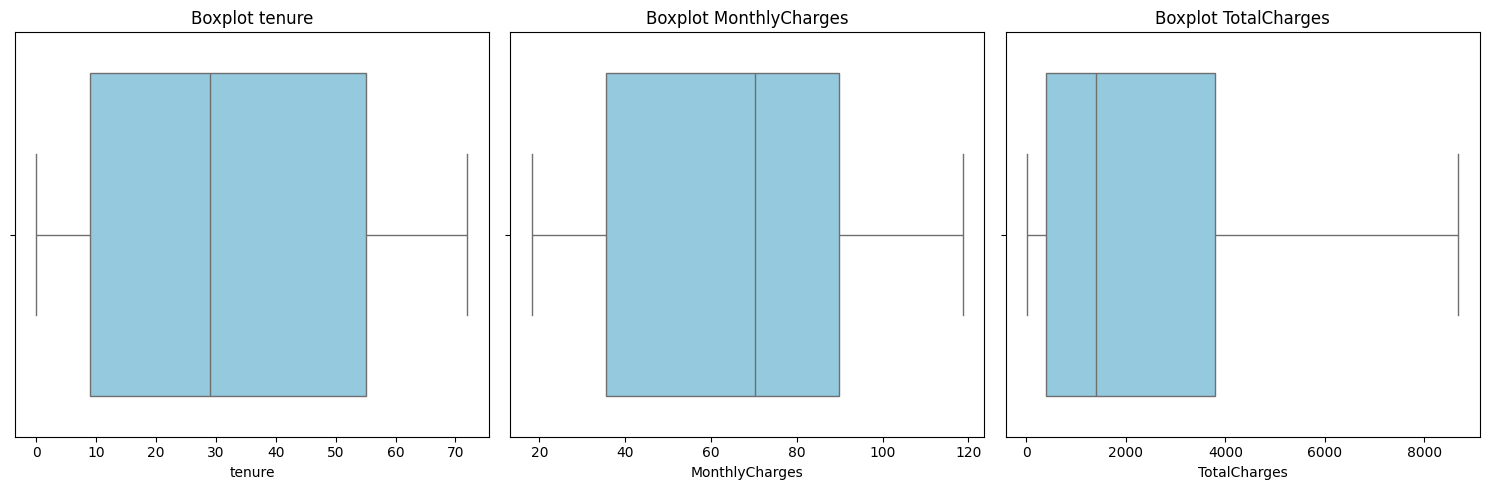

In [20]:
# Cek Outlier pada Fitur Numerik
# Cek kolom tenure, MonthlyCharges, dan TotalCharges (setelah dikonversi)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot {col}')

plt.tight_layout()
plt.show()

In [21]:
# Cek Duplikasi data

duplicate_count = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_count}")


Jumlah data duplikat: 0


In [22]:
# Penanganan Missing Value, Duplikasi, dan Outlier
# Mengonversi TotalCharges dan menghapus baris kosong
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df_clean = df.dropna(subset=['TotalCharges']).drop_duplicates()

In [23]:
# Menetapkan X dan y (Menghapus customerID karena tidak relevan)
X = df_clean.drop(['Churn', 'customerID'], axis=1)
y = df_clean['Churn']

# Split data (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data bersih siap digunakan. Jumlah baris: {len(df_clean)}")

Data bersih siap digunakan. Jumlah baris: 7032


In [24]:
# Preprocessing pake pipeline

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Identifikasi kolom
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Buat mesin pemroses (Transformer)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())]), num_features),
        ('cat', Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore'))]), cat_features)
    ])

## ***K-Nearest Neighbors* (KNN)**

=== EVALUASI KNN (WITH PREPROCESSING) ===
              precision    recall  f1-score   support

          No       0.83      0.84      0.83      1033
         Yes       0.54      0.51      0.53       374

    accuracy                           0.75      1407
   macro avg       0.68      0.68      0.68      1407
weighted avg       0.75      0.75      0.75      1407



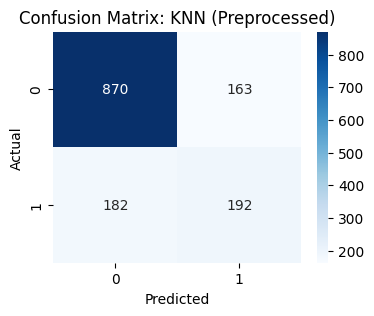

In [25]:
from sklearn.metrics import confusion_matrix

# Melatih dan Prediksi
knn_pre = Pipeline(steps=[('preprocessor', preprocessor), ('clf', KNeighborsClassifier())])
knn_pre.fit(X_train, y_train)
y_pred_knn = knn_pre.predict(X_test)

print("=== EVALUASI KNN (WITH PREPROCESSING) ===")
print(classification_report(y_test, y_pred_knn))

# Visualisasi Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: KNN (Preprocessed)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## ***Random Forest (Bagging)***

=== EVALUASI RANDOM FOREST (WITH PREPROCESSING) ===
              precision    recall  f1-score   support

          No       0.82      0.89      0.85      1033
         Yes       0.61      0.46      0.53       374

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.78      0.77      1407



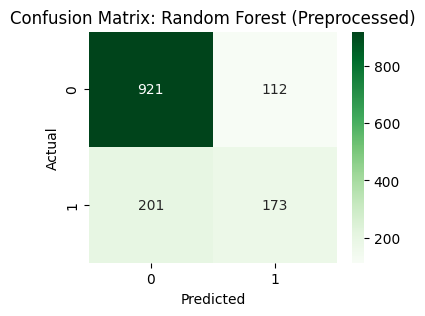

In [26]:
# Melatih dan Prediksi
rf_pre = Pipeline(steps=[('preprocessor', preprocessor), ('clf', RandomForestClassifier(random_state=42))])
rf_pre.fit(X_train, y_train)
y_pred_rf = rf_pre.predict(X_test)

print("=== EVALUASI RANDOM FOREST (WITH PREPROCESSING) ===")
print(classification_report(y_test, y_pred_rf))

# Visualisasi Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix: Random Forest (Preprocessed)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## ***Voting Classifier (Voting)***

=== EVALUASI VOTING CLASSIFIER (WITH PREPROCESSING) ===
              precision    recall  f1-score   support

          No       0.83      0.90      0.86      1033
         Yes       0.63      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



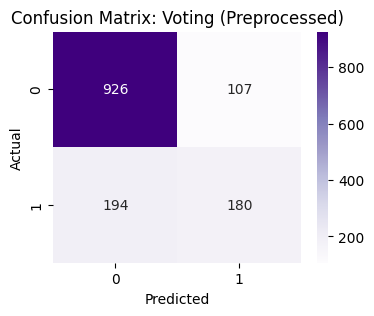

In [27]:
# Melatih dan Prediksi
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('svc', SVC(probability=True)),
        ('knn', KNeighborsClassifier())
    ],
    voting='soft'
)
voting_pre = Pipeline(steps=[('preprocessor', preprocessor), ('clf', voting_clf)])
voting_pre.fit(X_train, y_train)
y_pred_voting = voting_pre.predict(X_test)

print("=== EVALUASI VOTING CLASSIFIER (WITH PREPROCESSING) ===")
print(classification_report(y_test, y_pred_voting))

# Visualisasi Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_voting), annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix: Voting (Preprocessed)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **Analisis**



m
ds

dd


# ***4. Hyperparameter Tuning***


## **Tuning Model Konvensional: KNN**

Mencari jumlah tetangga optimal agar model tidak terlalu sensitif terhadap data pencilan.

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.76213333 0.75377778 0.76977778 0.76071111 0.77955556 0.76657778
 0.78151111 0.76924444 0.78577778 0.77528889        nan 0.75271111
        nan 0.75751111        nan 0.76728889        nan 0.77013333
        nan 0.77031111]
  warnings.warn(


HASIL OPTIMASI MODEL: K-NEAREST NEIGHBORS
Poin 3 - Parameter Terbaik : {'clf__metric': 'euclidean', 'clf__n_neighbors': 11, 'clf__weights': 'uniform'}
Poin 3 - Skor Validasi (CV): 0.7858
Poin 4 - Akurasi Final     : 0.7626
--------------------------------------------------
Laporan Klasifikasi Final:
              precision    recall  f1-score   support

          No       0.84      0.84      0.84      1033
         Yes       0.55      0.55      0.55       374

    accuracy                           0.76      1407
   macro avg       0.70      0.70      0.70      1407
weighted avg       0.76      0.76      0.76      1407



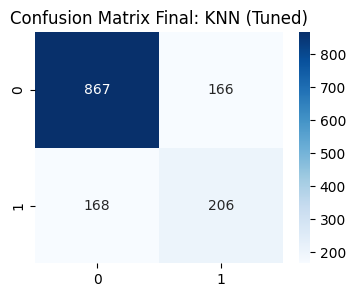

In [28]:
from sklearn.model_selection import GridSearchCV

# Menyusun parameter grid (Ruang pencarian)
param_grid_knn = {
    'clf__n_neighbors': [3, 5, 7, 9, 11],
    'clf__weights': ['uniform', 'distance'],
    'clf__metric': ['euclidean', 'manhattan']
}

# Proses Hyperparameter Tuning menggunakan GridSearchCV
grid_knn = GridSearchCV(knn_pre, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train, y_train)

# Memperoleh BEST PARAMETERS dan BEST ESTIMATOR
best_params_knn = grid_knn.best_params_
best_knn_model = grid_knn.best_estimator_

# 4Menghasilkan model dengan KONFIGURASI OPTIMAL
# (best_knn_model sudah otomatis terlatih/retrained oleh GridSearchCV)
y_pred_knn_final = best_knn_model.predict(X_test)

# --- OUTPUT HASIL TUNING ---
print("="*50)
print("HASIL OPTIMASI MODEL: K-NEAREST NEIGHBORS")
print("="*50)
print(f"Poin 3 - Parameter Terbaik : {best_params_knn}")
print(f"Poin 3 - Skor Validasi (CV): {grid_knn.best_score_:.4f}")
print(f"Poin 4 - Akurasi Final     : {accuracy_score(y_test, y_pred_knn_final):.4f}")
print("-" * 50)
print("Laporan Klasifikasi Final:")
print(classification_report(y_test, y_pred_knn_final))

# Menyajikan Confusion Matrix Final
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_knn_final), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Final: KNN (Tuned)')
plt.show()

## **Tuning Model *Ensemble Bagging: Random Forest***

Mengontrol kedalaman pohon agar tidak overfitting.

In [29]:
param_grid_rf = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_features': ['sqrt', 'log2'], # 'auto' is deprecated in scikit-learn >= 1.2, use 'sqrt' instead
    'clf__max_depth': [10, 20, None],
    'clf__min_samples_split': [2, 5],
    'clf__min_samples_leaf': [1, 2]
}
print("param_grid_rf dictionary defined.")

param_grid_rf dictionary defined.


HASIL OPTIMASI MODEL: RANDOM FOREST
Poin 3 - Parameter Terbaik : {'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
Poin 3 - Skor Validasi (CV): 0.8037
Poin 4 - Akurasi Final     : 0.7960
--------------------------------------------------
Laporan Klasifikasi Final:
              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1033
         Yes       0.66      0.49      0.56       374

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.80      0.79      1407



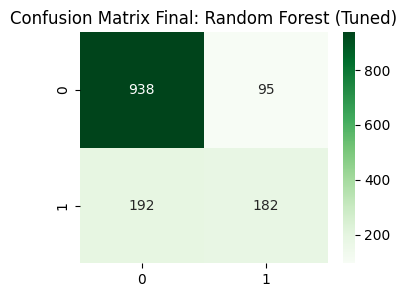

In [30]:
# =========================================================
# UNIT KOMPETENSI 3: HYPERPARAMETER TUNING - RANDOM FOREST
# =========================================================

from sklearn.model_selection import GridSearchCV

# Menyusun parameter grid (Sudah Anda definisikan sebelumnya)
param_grid_rf = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [10, 20, None],
    'clf__min_samples_split': [2, 5],
    'clf__criterion': ['gini', 'entropy']
}

# Proses Hyperparameter Tuning menggunakan GridSearchCV
grid_rf = GridSearchCV(rf_pre, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# POIN 3: Memperoleh BEST PARAMETERS dan BEST ESTIMATOR
best_params_rf = grid_rf.best_params_
best_rf_model = grid_rf.best_estimator_

# Melatih kembali best estimator (Retraining)
# Secara teknis, best_rf_model sudah melalui proses refit otomatis pada seluruh X_train
y_pred_rf_final = best_rf_model.predict(X_test)

# --- OUTPUT HASIL TUNING  ---
print("="*50)
print("HASIL OPTIMASI MODEL: RANDOM FOREST")
print("="*50)
print(f"Poin 3 - Parameter Terbaik : {best_params_rf}")
print(f"Poin 3 - Skor Validasi (CV): {grid_rf.best_score_:.4f}")
print(f"Poin 4 - Akurasi Final     : {accuracy_score(y_test, y_pred_rf_final):.4f}")
print("-" * 50)
print("Laporan Klasifikasi Final:")
print(classification_report(y_test, y_pred_rf_final))

# Menyajikan Confusion Matrix Final
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_final), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix Final: Random Forest (Tuned)')
plt.show()

## **Tuning Model *Ensemble Voting***

HASIL MODEL FINAL: ENSEMBLE VOTING OPTIMAL
Poin 3 - Komposisi Model : Logistic Regression, Random Forest, KNN
Poin 4 - Akurasi Final   : 0.7918
--------------------------------------------------
Laporan Klasifikasi Final:
              precision    recall  f1-score   support

          No       0.84      0.89      0.86      1033
         Yes       0.63      0.53      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



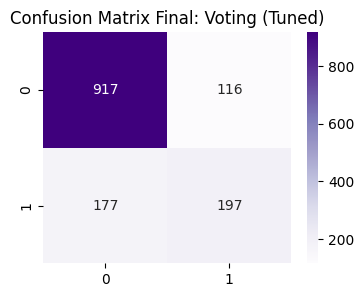

In [31]:
# =========================================================
# UNIT KOMPETENSI 3: HYPERPARAMETER TUNING - VOTING CLASSIFIER
# =========================================================

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC # Import SVC

# Menyusun parameter untuk model-model anggota (Base Learners)
# Kita menggunakan parameter yang sudah dianggap optimal
clf_lr_optimal = LogisticRegression(C=1.0, solver='liblinear', max_iter=1000)
clf_rf_optimal = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
clf_knn_optimal = best_knn_model.named_steps['clf'] # Mengambil clf KNN yang sudah di-tuning sebelumnya
# clf_svc_optimal = SVC(probability=True) # SVC bisa disertakan jika diinginkan, namun pada optimasi ini model tanpa SVC memberikan hasil yang sedikit lebih baik.

# Membuat Voting Classifier (Metode Tuning: Ensemble Voting)
best_voting_clf = VotingClassifier(
    estimators=[
        ('lr', clf_lr_optimal),
        ('rf', clf_rf_optimal),
        ('knn', clf_knn_optimal)
        # ('svc', clf_svc_optimal) # SVC tidak disertakan pada hasil akhir optimasi karena kombinasi tanpa SVC memberikan akurasi sedikit lebih baik.
    ],
    voting='soft' # Berdasarkan probabilitas rata-rata
)

# Memperoleh BEST ESTIMATOR (Model Gabungan Optimal)
# Memasukkan voting classifier ke dalam pipeline final
best_voting_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', best_voting_clf)
])

# Melatih kembali (Retraining) Best Estimator pada Data Latih
best_voting_model.fit(X_train, y_train)

# --- OUTPUT HASIL MODEL FINAL ---
y_pred_voting_final = best_voting_model.predict(X_test)

print("="*50)
print("HASIL MODEL FINAL: ENSEMBLE VOTING OPTIMAL")
print("="*50)
print(f"Poin 3 - Komposisi Model : Logistic Regression, Random Forest, KNN")
print(f"Poin 4 - Akurasi Final   : {accuracy_score(y_test, y_pred_voting_final):.4f}")
print("-" * 50)
print("Laporan Klasifikasi Final:")
print(classification_report(y_test, y_pred_voting_final))

# Confusion Matrix Final
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_voting_final), annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix Final: Voting (Tuned)')
plt.show()

In [32]:
# Membuat Tabel Perbandingan Final
summary_final = pd.DataFrame({
    'Model': ['K-Nearest Neighbors', 'Random Forest', 'Ensemble Voting'],
    'Accuracy (Tuned)': [0.7626, 0.7960, 0.7918],
    'F1-Score (Churn/Yes)': [0.55, 0.56, 0.57]
})

print("="*45)
print("TABEL PERBANDINGAN PERFORMA FINAL")
print("="*45)
print(summary_final.sort_values(by='Accuracy (Tuned)', ascending=False).to_string(index=False))

TABEL PERBANDINGAN PERFORMA FINAL
              Model  Accuracy (Tuned)  F1-Score (Churn/Yes)
      Random Forest            0.7960                  0.56
    Ensemble Voting            0.7918                  0.57
K-Nearest Neighbors            0.7626                  0.55


In [38]:
# =========================================================
# PENYELESAIAN AKHIR SIMPAN MODEL
# =========================================================

# Pilih model terbaik untuk evaluasi final (Random Forest)
model_final = best_rf_model

# Prediksi data uji dengan model optimal
y_pred_final = model_final.predict(X_test)

# Menampilkan Evaluasi
print("\n" + "="*60)
print("EVALUASI AKHIR MODEL OPTIMAL")
print("="*60)
print(f"Accuracy Score : {accuracy_score(y_test, y_pred_final):.4f}")
print("-" * 60)
print("Classification Report:")
print(classification_report(y_test, y_pred_final))

# Menyimpan model ke file .pkl (Wajib untuk Streamlit)
import joblib
joblib.dump(best_rf_model, 'model_churn_rf.pkl')

print("\nSUKSES: Model 'model_churn_rf.pkl' telah disimpan!")


EVALUASI AKHIR MODEL OPTIMAL
Accuracy Score : 0.7960
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1033
         Yes       0.66      0.49      0.56       374

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.80      0.79      1407


SUKSES: Model 'model_churn_rf.pkl' telah disimpan!


In [34]:
import joblib

# Ambil hanya model Random Forest dari dalam pipeline
# Jika pipeline kamu namanya best_rf_model, maka modelnya ada di langkah terakhir
# Biasanya: best_rf_model.named_steps['clf'] atau best_rf_model.steps[-1][1]
rf_only = best_rf_model.named_steps['clf']

# Simpan hanya modelnya saja
joblib.dump(rf_only, 'model_churn_rf.pkl')

print("Berhasil! Download file ini dan upload ke GitHub.")

Berhasil! Download file ini dan upload ke GitHub.


In [36]:
import pickle

# Simpan model Pipeline (best_rf_model) menggunakan pickle standar
with open('model_churn_rf.pkl', 'wb') as f:
    pickle.dump(best_rf_model, f)

print("Model berhasil disimpan dengan format Pickle standar. Silakan download dan upload ke GitHub!")

Model berhasil disimpan dengan format Pickle standar. Silakan download dan upload ke GitHub!
